**Name: Arwaz Khan**

**Roll No.: 242210005**

**Date: 15/04/2025**

**Time: 11:00 AM**

# **ANN**

(1) Design and implement a neural network model to perform binary image classification. The objective is to classify images into two distinct categories — cats and dogs — using a feed-forward neural network approach. Dataset(https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset). (You may need manual feature extraction)

• What were the limitations of FFNNs with high-dimensional image inputs?

(2) Design and implement a back propagation neural network model to perform binary image classification. The objective is to classify images into two distinct categories — cats and dogs.

In [1]:
#Install dependencies
!pip install opencv-python scikit-learn

In [2]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
# Mount Google Drive and set paths
drive.mount('/content/drive')  # Upload your dataset to Drive
dataset_path = '/content/drive/MyDrive/dog_and_cat_classification_dataset'  # Adjust this if needed

# Print the dataset path to verify it
print(f"Dataset path: {dataset_path}")

# Check if the dataset directory exists
if os.path.exists(dataset_path):
    print("Dataset directory found!")
else:
    print(f"Error: Dataset directory not found at {dataset_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset path: /content/drive/MyDrive/dog_and_cat_classification_dataset
Dataset directory found!


In [4]:
cat_folder = os.path.join(dataset_path, 'Cat')
dog_folder = os.path.join(dataset_path, 'Dog')
if os.path.exists(cat_folder) and os.path.exists(dog_folder):
    print("Cat and Dog subfolders found!")
else:
    print("Error: Cat or Dog subfolders not found. Please check the dataset path and folder structure.")

Cat and Dog subfolders found!


# **TASK 1:**

In [5]:
# Feature extraction function
IMG_SIZE = 128
def extract_features(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
    return hist / np.sum(hist)

In [6]:
# Load images and extract features
X, y = [], []

for folder, label in [(cat_folder, 'cat'), (dog_folder, 'dog')]:
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        image = cv2.imread(img_path)
        if image is not None:
            features = extract_features(image)
            X.append(features)
            y.append(label)

X = np.array(X)
y = np.array(y)

In [7]:
# Encode labels and preprocess features
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Build the Feedforward Neural Network
model = Sequential([
    Dense(256, input_shape=(256,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 450ms/step - accuracy: 0.4062 - loss: 0.7754 - val_accuracy: 0.4167 - val_loss: 0.6667
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.7396 - loss: 0.5714 - val_accuracy: 0.5000 - val_loss: 0.8313
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.7951 - loss: 0.4314 - val_accuracy: 0.4167 - val_loss: 0.9744
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8264 - loss: 0.3690 - val_accuracy: 0.3333 - val_loss: 1.0285
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8993 - loss: 0.3068 - val_accuracy: 0.3333 - val_loss: 1.0745
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.9236 - loss: 0.2640 - val_accuracy: 0.3333 - val_loss: 1.1140
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9236 - loss: 0.2249 - val_accuracy: 0.3333 - val_loss: 1.1603
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9514 - loss: 0.1969 - val_accuracy: 0.4167 - val_loss:

In [10]:
# Evaluate and print results
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=le.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5833 - loss: 1.7792
Test Accuracy: 0.58
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
              precision    recall  f1-score   support

         cat       0.33      0.25      0.29         4
         dog       0.67      0.75      0.71         8

    accuracy                           0.58        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.56      0.58      0.57        12



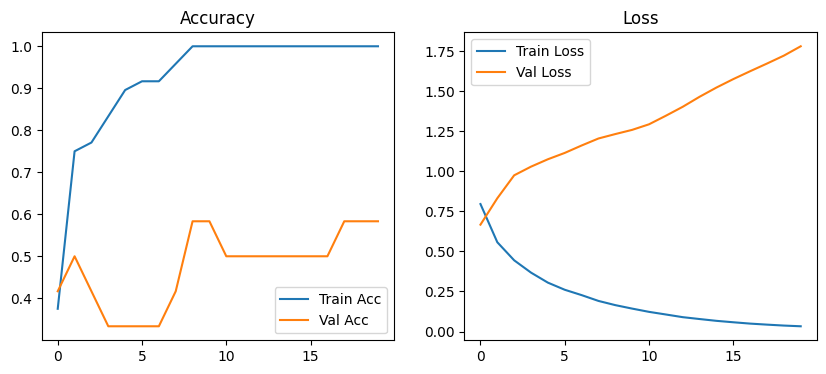

In [11]:
# STEP 10: Plot accuracy and loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

**• What were the limitations of FFNNs with high-dimensional image inputs?**

Limitations of FFNNs with High-Dimensional Images:

1. High computational cost – Too many parameters when flattening large images.

2. No spatial awareness – FFNNs treat pixels independently, ignoring image structure.

3. Manual feature extraction – Can't learn patterns automatically like CNNs.

4. Overfitting – Large networks with limited data often memorize instead of generalize.

5. No translation invariance – Can’t recognize objects in different positions.




---



# **TASK 2:**

In [12]:
# Preprocessing & Manual Feature Extraction
def extract_features(image):
    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
    return hist / np.sum(hist)  # Normalize

In [13]:
# Backpropagation Network (Using Keras)
model = Sequential([
    Dense(256, input_dim=256, activation='relu'),  # Input layer
    Dense(128, activation='relu'),                 # Hidden layer
    Dense(1, activation='sigmoid')                 # Output layer (binary)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model (backprop happens here)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train (Backpropagation used automatically under the hood)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.3750 - loss: 0.7408 - val_accuracy: 0.3333 - val_loss: 0.9210
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7153 - loss: 0.5335 - val_accuracy: 0.3333 - val_loss: 1.0411
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8715 - loss: 0.3941 - val_accuracy: 0.3333 - val_loss: 1.2108
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9236 - loss: 0.3356 - val_accuracy: 0.4167 - val_loss: 1.3511
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9236 - loss: 0.2824 - val_accuracy: 0.4167 - val_loss: 1.4093
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9271 - loss: 0.2531 - val_accuracy: 0.5000 - val_loss: 1.3917
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9757 - loss: 0.2227 - val_accuracy: 0.4167 - val_loss: 1.3945
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9861 - loss: 0.1815 - val_accuracy: 0.5000 - val_loss: 1.447

In [16]:
# Evaluation
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 2.3075
Accuracy: 0.5


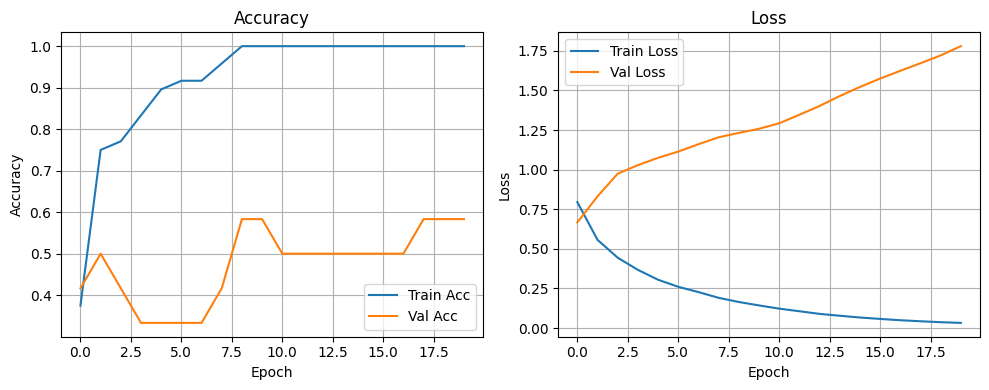

In [17]:
plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



---

